In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df['age'] = 2024 - df['Year_Birth']
df = df.dropna()

<AxesSubplot:xlabel='age', ylabel='MntSweetProducts'>

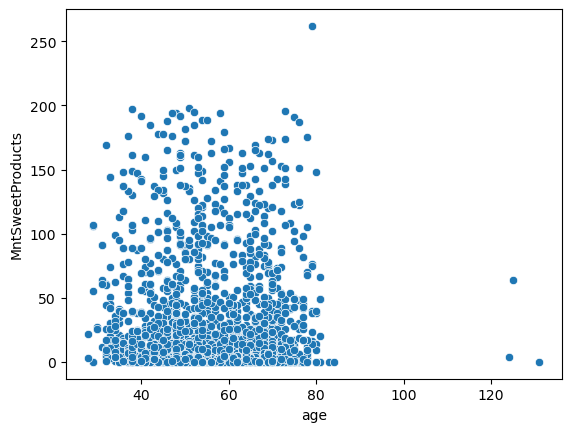

In [5]:
sns.scatterplot(data=df, x='age', y='MntSweetProducts')

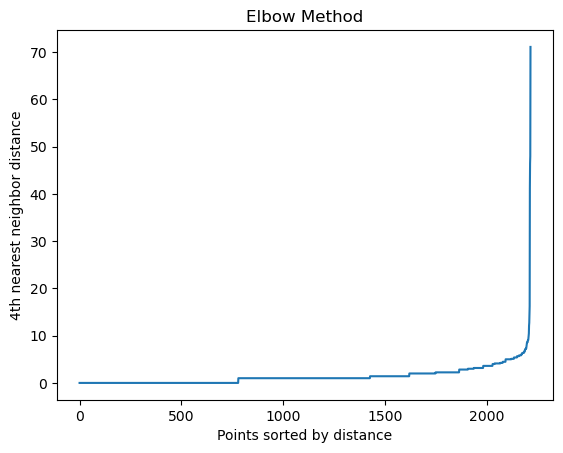

In [9]:
from sklearn.neighbors import NearestNeighbors

# Assuming X is your feature matrix
# Calculate the distance to the kth nearest neighbor for each point
k = 4  # Choose the number of neighbors for the Elbow Method
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)
distances = np.sort(distances[:, -1])

# Plot the distance to the kth nearest neighbor
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th nearest neighbor distance')
plt.title('Elbow Method')
plt.show()

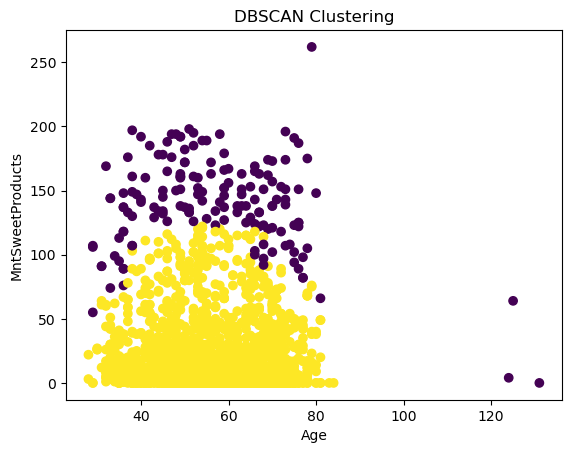

In [12]:
X = df[['age','MntSweetProducts']]

dbscan = DBSCAN(eps=8.5, min_samples=20)

# Fit DBSCAN to the data
dbscan.fit(X)

# Retrieve cluster labels
cluster_labels = dbscan.labels_

# Visualize clusters
plt.scatter(X['age'], X['MntSweetProducts'], c=cluster_labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('MntSweetProducts')
plt.title('DBSCAN Clustering')
plt.show()